In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


In [2]:
demand_data = pd.read_csv("/Users/mrbinit/Downloads/data/demand.csv")
supply_data = pd.read_csv("/Users/mrbinit/Downloads/data/supply.csv")

In [3]:
demand_data.head(10)

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447
5,01-04-2004,148.209000,6.106154,93.333333,2.083333,217600,12112.815
6,01-07-2004,152.716667,5.894286,95.600000,2.500000,213500,12305.307
7,01-10-2004,157.535333,5.736154,93.866667,3.000000,228800,12527.214
8,01-01-2005,163.481333,5.768462,94.066667,3.500000,232500,12767.286
9,01-04-2005,169.347333,5.708462,90.200000,4.000000,233700,12922.656


In [4]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           81 non-null     object 
 1   CSUSHPISA      80 non-null     float64
 2   MORTGAGE30US   81 non-null     float64
 3   UMCSENT        81 non-null     float64
 4   INTDSRUSM193N  74 non-null     float64
 5   MSPUS          81 non-null     int64  
 6   GDP            81 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.6+ KB


In [5]:
demand_data.describe()

,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
count,80.000000,81.000000,81.000000,74.000000,81.000000,81.000000
mean,180.658712,4.705420,82.149794,1.961712,281104.938272,17298.487852
std,41.410501,1.114588,12.408088,1.732885,68121.518078,3851.890323
min,129.321000,2.760714,56.100000,0.250000,186000.000000,11174.129000
25%,148.204500,3.822308,73.866667,0.750000,228100.000000,14448.882000
50%,172.270000,4.440000,82.966667,1.041667,258400.000000,16629.050000
75%,196.770917,5.768462,93.066667,2.562500,318400.000000,19894.750000
max,303.422667,6.664615,98.933333,6.250000,479500.000000,26465.865000


In [6]:
supply_data.head(10)

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895
5,01-04-2004,148.209,3.9,2080,526483.3333,16079
6,01-07-2004,152.7166667,4.3,2069.666667,552939,15656
7,01-10-2004,157.5353333,4.1,2086,561413.3333,15361
8,01-01-2005,163.4813333,4.266666667,2105,590790.3333,15748
9,01-04-2005,169.3473333,4.266666667,2137.666667,611957,16061


In [7]:
supply_data.describe()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
count,82,82,82,82,82,82
unique,82,81,67,81,82,81
top,01-01-2003,.,4.8,1455.333333,421328.6667,16814
freq,1,2,3,2,1,2


In [8]:
supply_data['DATE'] = pd.to_datetime(supply_data['DATE'])

supply_data.head(10)


,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,2003-01-01,129.321,4.2,1806.333333,421328.6667,14908
1,2003-01-04,131.756,3.833333333,1837.666667,429308.6667,15244
2,2003-01-07,135.013,3.633333333,1937.333333,458890,15614
3,2003-01-10,138.8356667,3.966666667,1972.333333,491437.3333,15654
4,2004-01-01,143.2986667,3.7,1994.666667,506856.3333,15895
5,2004-01-04,148.209,3.9,2080,526483.3333,16079
6,2004-01-07,152.7166667,4.3,2069.666667,552939,15656
7,2004-01-10,157.5353333,4.1,2086,561413.3333,15361
8,2005-01-01,163.4813333,4.266666667,2105,590790.3333,15748
9,2005-01-04,169.3473333,4.266666667,2137.666667,611957,16061


In [9]:
demand_data['DATE'] = pd.to_datetime(demand_data['DATE'])
demand_data.head(10)

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,2003-01-01,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.298667,5.597500,98.000000,2.000000,212700,11923.447
5,2004-01-04,148.209000,6.106154,93.333333,2.083333,217600,12112.815
6,2004-01-07,152.716667,5.894286,95.600000,2.500000,213500,12305.307
7,2004-01-10,157.535333,5.736154,93.866667,3.000000,228800,12527.214
8,2005-01-01,163.481333,5.768462,94.066667,3.500000,232500,12767.286
9,2005-01-04,169.347333,5.708462,90.200000,4.000000,233700,12922.656


In [10]:
demand_data = demand_data.sort_values('DATE')
supply_data = supply_data.sort_values('DATE')


In [11]:
merged_data = pd.merge(supply_data, demand_data, on = 'DATE', suffixes=('_supply', '_demand'))
print(merged_data)

         DATE CSUSHPISA_supply       MSACSR       PERMIT    TLRESCONS   
0  2003-01-01          129.321          4.2  1806.333333  421328.6667  \
1  2003-01-04          131.756  3.833333333  1837.666667  429308.6667   
2  2003-01-07          135.013  3.633333333  1937.333333       458890   
3  2003-01-10      138.8356667  3.966666667  1972.333333  491437.3333   
4  2004-01-01      143.2986667          3.7  1994.666667  506856.3333   
..        ...              ...          ...          ...          ...   
76 2022-01-01          290.868  6.233333333         1864       910611   
77 2022-01-04      303.4226667          8.7  1734.666667  947300.3333   
78 2022-01-07      301.7263333  9.566666667  1610.666667       910346   
79 2022-01-10      297.8966667          9.2  1455.333333  870620.6667   
80 2023-01-01                .  8.033333333  1424.333333  842559.6667   

   EVACANTUSQ176N  CSUSHPISA_demand  MORTGAGE30US    UMCSENT  INTDSRUSM193N   
0           14908        129.321000      5.8

The code snippet merged_data = pd.merge(supply_data, demand_data, on='DATE', suffixes=('_demand', '_supply')) performs a merge operation between two DataFrames (supply_data and demand_data) based on the common column "DATE". The resulting merged DataFrame is then assigned to the variable merged_data. The suffixes=('_demand', '_supply') argument is used to append suffixes to the overlapping column names.

In [12]:
merged_data.dropna(subset = ['MSACSR', 'PERMIT', 'TLRESCONS', 'EVACANTUSQ176N', 'MORTGAGE30US', 'GDP', 'UMCSENT'], inplace = True)
imputer = SimpleImputer(strategy= 'mean')
merged_data['INTDSRUSM193N'] = imputer.fit_transform(merged_data[['INTDSRUSM193N']])
merged_data = merged_data.reset_index(drop=True)

In [13]:
# print(merged_data)

The inplace=True parameter is used in pandas to specify that the changes made to a DataFrame should be applied directly to the DataFrame itself, modifying it in place.

By setting inplace=True, the dropna() operation modifies the merged_data DataFrame directly, removing the rows with missing values from the specified columns. The dropna() function will drop any row that has a NaN value in at least one of the specified columns.

In [14]:
# imputer = SimpleImputer(strategy= 'mean')
# merged_data['INTDSRUSM193N'] = imputer.fit_transform(merged_data[['INTDSRUSM193N']])
# merged_data = merged_data.reset_index(drop=True)

the SimpleImputer class is an imputation transformer that is used to fill missing values in a dataset.the instance called SimpleImputer is created and assign it to the variable imputer.
The strategy='mean' argument is passed to the SimpleImputer constructor. This specifies that the missing values should be replaced with the mean value of the column.
then call the fit_transform() method on the imputer object, passing in the "INTDSRUSM193N" column of the merged_data DataFrame as an argument

In [15]:
print(merged_data)

         DATE CSUSHPISA_supply       MSACSR       PERMIT    TLRESCONS   
0  2003-01-01          129.321          4.2  1806.333333  421328.6667  \
1  2003-01-04          131.756  3.833333333  1837.666667  429308.6667   
2  2003-01-07          135.013  3.633333333  1937.333333       458890   
3  2003-01-10      138.8356667  3.966666667  1972.333333  491437.3333   
4  2004-01-01      143.2986667          3.7  1994.666667  506856.3333   
..        ...              ...          ...          ...          ...   
76 2022-01-01          290.868  6.233333333         1864       910611   
77 2022-01-04      303.4226667          8.7  1734.666667  947300.3333   
78 2022-01-07      301.7263333  9.566666667  1610.666667       910346   
79 2022-01-10      297.8966667          9.2  1455.333333  870620.6667   
80 2023-01-01                .  8.033333333  1424.333333  842559.6667   

   EVACANTUSQ176N  CSUSHPISA_demand  MORTGAGE30US    UMCSENT  INTDSRUSM193N   
0           14908        129.321000      5.8

In [16]:
merged_data.drop('CSUSHPISA_supply', axis = 1, inplace= True)

 CSUSHPISA: This variable serves as a proxy for home prices and represents the home price index for the United States. The axis=1 parameter is specified to indicate that the column should be dropped. Setting axis=1 means that the operation is performed along the columns.The axis parameter in pandas is used to specify the axis along which a particular operation should be performed. In the case of the drop() function, the axis parameter determines whether to drop a 
 column (axis=1) or a row (axis=0).



In [17]:
merged_data.rename(columns= {'CSUSHPISA_demand' : 'CSUSHPISA'}, inplace = True) 

In [18]:
print(merged_data)

         DATE       MSACSR       PERMIT    TLRESCONS EVACANTUSQ176N   
0  2003-01-01          4.2  1806.333333  421328.6667          14908  \
1  2003-01-04  3.833333333  1837.666667  429308.6667          15244   
2  2003-01-07  3.633333333  1937.333333       458890          15614   
3  2003-01-10  3.966666667  1972.333333  491437.3333          15654   
4  2004-01-01          3.7  1994.666667  506856.3333          15895   
..        ...          ...          ...          ...            ...   
76 2022-01-01  6.233333333         1864       910611          15166   
77 2022-01-04          8.7  1734.666667  947300.3333          15286   
78 2022-01-07  9.566666667  1610.666667       910346          15306   
79 2022-01-10          9.2  1455.333333  870620.6667          14554   
80 2023-01-01  8.033333333  1424.333333  842559.6667          15053   

     CSUSHPISA  MORTGAGE30US    UMCSENT  INTDSRUSM193N   MSPUS        GDP  
0   129.321000      5.840769  79.966667       2.250000  186000  11174.1

In [19]:
merged_data['CSUSHPISA'] = merged_data['CSUSHPISA'].fillna(merged_data['CSUSHPISA'].mean())
print(merged_data)

         DATE       MSACSR       PERMIT    TLRESCONS EVACANTUSQ176N   
0  2003-01-01          4.2  1806.333333  421328.6667          14908  \
1  2003-01-04  3.833333333  1837.666667  429308.6667          15244   
2  2003-01-07  3.633333333  1937.333333       458890          15614   
3  2003-01-10  3.966666667  1972.333333  491437.3333          15654   
4  2004-01-01          3.7  1994.666667  506856.3333          15895   
..        ...          ...          ...          ...            ...   
76 2022-01-01  6.233333333         1864       910611          15166   
77 2022-01-04          8.7  1734.666667  947300.3333          15286   
78 2022-01-07  9.566666667  1610.666667       910346          15306   
79 2022-01-10          9.2  1455.333333  870620.6667          14554   
80 2023-01-01  8.033333333  1424.333333  842559.6667          15053   

     CSUSHPISA  MORTGAGE30US    UMCSENT  INTDSRUSM193N   MSPUS        GDP  
0   129.321000      5.840769  79.966667       2.250000  186000  11174.1

the fillna() function replaces any missing values in the 'CSUSHPISA' column with the mean value obtained in step 3.

In [20]:
correlation = merged_data.corr()['CSUSHPISA']
correlation_table = pd.DataFrame(correlation).reset_index()
correlation_table.columns = ['Factors', 'correlation with CSUSHPISA']
print(correlation_table)

           Factors  correlation with CSUSHPISA
0             DATE                    0.726768
1           MSACSR                    0.121048
2           PERMIT                    0.382217
3        TLRESCONS                    0.861225
4   EVACANTUSQ176N                   -0.584710
5        CSUSHPISA                    1.000000
6     MORTGAGE30US                   -0.215379
7          UMCSENT                   -0.096213
8    INTDSRUSM193N                    0.102608
9            MSPUS                    0.907924
10             GDP                    0.823877


the negative correlation coefficient of -0.215379 between the average interest rate for a 30-year fixed-rate mortgage and the S&P/Case-Shiller U.S. National Home Price Index suggests that there is a inverse relationship between these two variables. In other words, as one variable increases, the other tends to decrease, and vice versa.
This negative correlation indicates that there is an association between changes in mortgage interest rates and changes in home prices. When mortgage interest rates are low, it becomes more affordable for individuals to borrow money to purchase homes. As a result, increased demand for homes can drive up home prices.
Conversely, when mortgage interest rates are high, borrowing money for home purchases becomes more expensive, leading to decreased demand for homes. This reduced demand can put downward pressure on home prices.

The correlation coefficient of 0.823877 between Gross Domestic Product (GDP) and the S&P/Case-Shiller U.S. National Home Price Index indicates a strong positive relationship between these two variables.
A correlation coefficient measures the strength and direction of the linear relationship between two variables, ranging from -1 to 1. In this case, a correlation coefficient of 0.823877 suggests a strong positive correlation, meaning that as GDP increases, the S&P/Case-Shiller U.S. National Home Price Index tends to increase as well.

In [21]:
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])
merged_data.head(10)

,DATE,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,2003-01-01,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447
5,2004-01-04,3.9,2080,526483.3333,16079,148.209000,6.106154,93.333333,2.083333,217600,12112.815
6,2004-01-07,4.3,2069.666667,552939,15656,152.716667,5.894286,95.600000,2.500000,213500,12305.307
7,2004-01-10,4.1,2086,561413.3333,15361,157.535333,5.736154,93.866667,3.000000,228800,12527.214
8,2005-01-01,4.266666667,2105,590790.3333,15748,163.481333,5.768462,94.066667,3.500000,232500,12767.286
9,2005-01-04,4.266666667,2137.666667,611957,16061,169.347333,5.708462,90.200000,4.000000,233700,12922.656


In [22]:
merged_data.set_index('DATE', inplace= True)

In [23]:
merged_data.head(10)

,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
DATE,,,,,,,,,,
2003-01-01,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
2003-01-04,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2003-01-07,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
2003-01-10,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
2004-01-01,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447
2004-01-04,3.9,2080,526483.3333,16079,148.209000,6.106154,93.333333,2.083333,217600,12112.815
2004-01-07,4.3,2069.666667,552939,15656,152.716667,5.894286,95.600000,2.500000,213500,12305.307
2004-01-10,4.1,2086,561413.3333,15361,157.535333,5.736154,93.866667,3.000000,228800,12527.214
2005-01-01,4.266666667,2105,590790.3333,15748,163.481333,5.768462,94.066667,3.500000,232500,12767.286


In [24]:
merged_data['MSACSR'] = pd.to_numeric(merged_data['MSACSR'], errors= 'coerce')

pd.to_numeric: This is a function provided by the pandas library that converts a series or column of data into numeric format.
merged_data['MSACSR']: This accesses the 'MSACSR' column in the 'merged_data' DataFrame. It assumes that 'merged_data' is a DataFrame with a column named 'MSACSR'.
errors='coerce': This parameter specifies how errors should be handled during the conversion. When set to 'coerce', it means that if any values in the 'MSACSR' column cannot be converted to numeric format, they will be replaced with NaN (Not a Number).


In [25]:
merged_data['Permit'] = pd.to_numeric(merged_data['PERMIT'], errors= 'coerce')
merged_data['TLRESCONS'] = pd.to_numeric(merged_data['TLRESCONS'], errors= 'coerce')
merged_data['EVACANTUSQ176N'] = pd.to_numeric(merged_data['EVACANTUSQ176N'], errors= 'coerce')

In [26]:
print(merged_data)

              MSACSR       PERMIT    TLRESCONS  EVACANTUSQ176N   CSUSHPISA   
DATE                                                                         
2003-01-01  4.200000  1806.333333  421328.6667           14908  129.321000  \
2003-01-04  3.833333  1837.666667  429308.6667           15244  131.756000   
2003-01-07  3.633333  1937.333333  458890.0000           15614  135.013000   
2003-01-10  3.966667  1972.333333  491437.3333           15654  138.835667   
2004-01-01  3.700000  1994.666667  506856.3333           15895  143.298667   
...              ...          ...          ...             ...         ...   
2022-01-01  6.233333         1864  910611.0000           15166  290.868000   
2022-01-04  8.700000  1734.666667  947300.3333           15286  303.422667   
2022-01-07  9.566667  1610.666667  910346.0000           15306  301.726333   
2022-01-10  9.200000  1455.333333  870620.6667           14554  297.896667   
2023-01-01  8.033333  1424.333333  842559.6667           15053  

In [27]:
merged_data.head()

,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP,Permit
DATE,,,,,,,,,,,
2003-01-01,4.200000,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129,1806.333333
2003-01-04,3.833333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766,1837.666667
2003-01-07,3.633333,1937.333333,458890.0000,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669,1937.333333
2003-01-10,3.966667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234,1972.333333
2004-01-01,3.700000,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447,1994.666667


          Factors  correlation with CSUSHPISA
3       TLRESCONS                    0.861225
5       CSUSHPISA                    1.000000
6    MORTGAGE30US                   -0.215379
7         UMCSENT                   -0.096213
8   INTDSRUSM193N                    0.102608
9           MSPUS                    0.907924
10            GDP                    0.823877


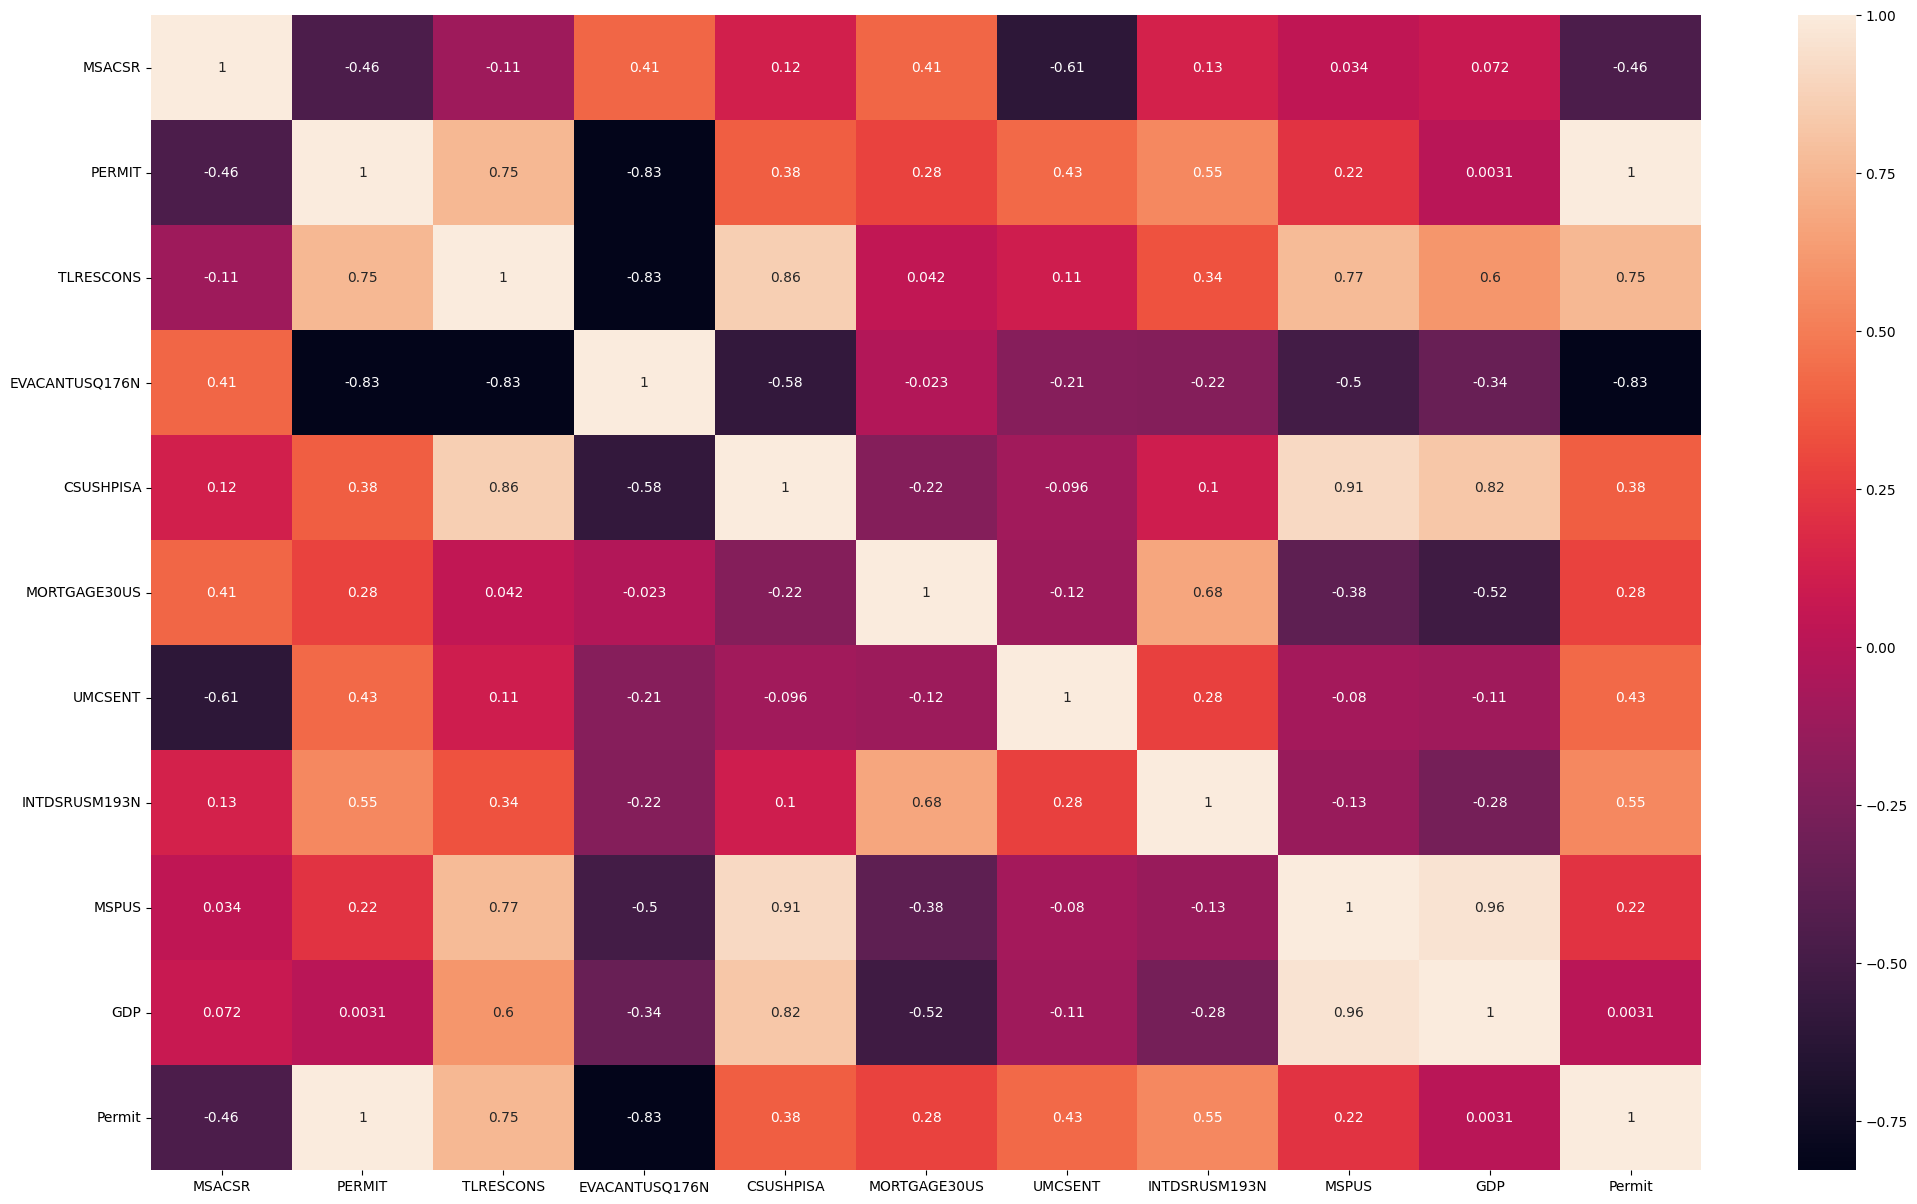

In [28]:
exclude_columns = ['DATE', 'MSACSR', 'PERMIT', 'EVACANTUSQ176N']
correlation_table = correlation_table[~correlation_table['Factors'].isin(exclude_columns)]

print(correlation_table)
plt.figure(figsize=(25, 15))
sns.heatmap(merged_data.corr(), annot=True)
plt.show()





Normalization processing using the scikit-learn. 

In [29]:
#merged_data ['Quarter'] = merged_data.index.to_period('Q')

# group_data[]

merged_data.index: This refers to the index of the DataFrame merged_data. The index represents the row labels or identifiers of the DataFrame.
.to_period('Q'): The to_period method is used to convert the index to a specific period frequency. In this case, the argument 'Q' is passed, which represents the quarterly frequency.By applying .to_period('Q'), the index values of merged_data are converted to quarterly periods, such as '2000Q1', '2000Q2', etc. Each period represents a specific quarter in time.

In [30]:
#merged_data['Quarter'] = merged_data['Quarter'].astype(str)

astype(str): The .astype() method is used to change the data type of the column to the specified type. In this case, the argument str is passed, indicating that the data type should be converted to a string.

By applying .astype(str), the data type of the 'QUARTER' column is changed from the original type (which could be a datetime or period type) to a string type.



In [31]:
#grouped_data = merged_data.groupby('Quarter').agg({'MSACSR': 'sum', 'CSUSHPISA' : 'mean'}).reset_index()


In [32]:
#normalizing the data using min max scale
#scaler = MinMaxScaler()
#grouped_data[['MSACSR', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['MSACSR', 'CSUSHPISA']])


it_transform method to the grouped_data[['MSACSR', 'CSUSHPISA']] DataFrame, which selects the 'MSACSR' and 'CSUSHPISA' columns. The result of the transformation is then assigned back to the same columns in grouped_data.



In [33]:
#grouped_data.head(10)

In the above program, we have normalize both MSACSR and CSUSHPISA 


In [34]:
# grouped_data = grouped_data.sort_values('Quarter')
# # Adjust the figure size as per your preference
# plt.figure(figsize = (16, 6))
# bar_width = 0.4
# opacity = 0.8


opacity is set to 0.8, indicating that the plotted objects (such as bars in a bar plot) will have a transparency level of 0.8 or 80%. This means that the plotted objects will be somewhat transparent, allowing some of the background content to show through.



In [35]:
# merged_data['QUARTER'] = merged_data.index.to